In [1]:
import requests
import bs4
import re
from re import findall
import numpy as np
import pandas as pd
import random
from lxml.html import fromstring
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
from collections import Counter
from rake_nltk import Rake

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ibrahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Questions to Answer
Data is collected in the period before 2/14/2021

- Where are the companies that require remote employees located?
- What are the posting rates for remote positions by companies from these locations?
- What are the most requested remote positions in all locations?
- What are the most requested qualificatios for remote positions in all locations?
- How are the salaries distributed?
- What are the characteristics of lower- and higher-pay jobs?

### Data Description
Company: company name <br>
Date: the time a job posted <br>
JobLoc: job location <br>
JobTitls: the title of the job <br>
Qualifications: the required qualifications <br>
Salary: the salary <br>
Text: the job description <br>

### Where are the companies that require remote employees located?

In [2]:
# The following are the active remote jobs available at companies in the following cities
# These cities are the top 5 cities requesting remote jobs according to indeed.
# the data for the cities are gathered in only the last 30 days
nyc=pd.read_csv(r'indeed\IndeedNYCtest.csv')
chicago=pd.read_csv(r'indeed\IndeedChicagotest.csv')
atlanta=pd.read_csv(r'indeed\IndeedAtlantatest.csv')
LA=pd.read_csv(r'indeed\IndeedLAtest.csv')
DC=pd.read_csv(r'indeed\IndeedDCtest.csv')

# remove any data after 30 days
nyc=nyc[nyc.Date != '30+ days ago']
chicago=chicago[chicago.Date != '30+ days ago']
atlanta=atlanta[atlanta.Date != '30+ days ago']
LA=LA[LA.Date != '30+ days ago']
DC=DC[DC.Date != '30+ days ago']

In [4]:
nyc.head(5)

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text
0,Gesture,Just posted,NYC,Customer Service Intern,Customer Service: 1 year (Preferred)US work au...,NaN,We are on a mission to make the world smaller ...
1,Rorixwell Inc.,Today,NYC,Online ESL Tutor,"Experience:childcare, 1 year (Preferred)Educat...",$12 - $15 an hour,HIRING ONLINE ENGLISH TEACHER!Rorixwell is hir...
2,THE CENTER FOR HUMAN REPRODUCTION,1 day ago,NYC,Social Media Manager,Associate (Preferred)Social Media Management: ...,$15 - $30 an hour,Prominent clinical fertility and research cent...
3,Club Feast,1 day ago,NYC,Strategy and Operations Manager,US work authorization (Required)Bachelor's (Pr...,"$60,000 - $70,000 a year",Strategy and Operations Manager Who You AreYou...
4,Discovery Communications,1 day ago,NYC,Intern Program Event & Marketing Internship- S...,NaN,NaN,Internship Description:\n\nThe Intern Program ...


In [5]:
chicago.head(5)

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text
0,eXp Realty,1 day ago,Chicago,Accounting AR Analyst,NaN,NaN,eXp Realty is one of the fastest growing real ...
1,Prime Consulting Inc,1 day ago,Chicago,Mortgage Processor,"Experience: Loan Processing, 1 year (Preferred)","$41,659 - $42,491 a year",Job Title: Mortgage Loan ProcessorLocation: Re...
2,P & K Market Research,1 day ago,Chicago,Associate Research Strategist,NaN,"$35,000 - $40,000 a year",Associate Research StrategistP & K Market Rese...
3,Greenworks Lending,2 days ago,Chicago,Associate Director of Market Activation,NaN,NaN,About Greenworks Lending\nGreenworks Lending i...
4,LafargeHolcim in the US,4 days ago,Chicago,"Communications Intern, Geocycle",NaN,NaN,"Overview:\n\nCommunications Intern, Geocycle\n..."


In [6]:
atlanta.head(5)

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text
0,American Addiction Centers,Today,Atlanta,"Outreach Associate, Business Development - Atl...",NaN,NaN,Overview:\n\nCompany Summary\nIf you are searc...
1,The Social Element,Today,Atlanta,Social Media Insights Analyst - North America,NaN,NaN,"At The Social Element, we are currently lookin..."
2,ServiceMaster,Today,Atlanta,IT Program Mgr I,Bachelor's (Preferred)PMP (Preferred),NaN,"Sr. IT Program MgrFull TimeTechnicalRemote, GA..."
3,Roostas Belts,Today,Atlanta,Independent Sales Representative,High school or equivalent (Preferred)Sales Exp...,NaN,Opportunity to partner with a growing golf and...
4,Beazer Homes,1 day ago,Atlanta,Customer Advocate Associate,NaN,NaN,Overview:\n\nOverview: This position is respon...


In [7]:
LA.head(5)

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text
0,Hyperloop Transportation Technologies,Today,LA,Contributor | Experience Designer,NaN,NaN,Are you ready to join the team designing the f...
1,Latham & Watkins LLP,Today,LA,ServiceNow Business Process Analyst,NaN,NaN,"Latham & Watkins, a global law firm consistent..."
2,Gesture,Today,LA,Customer Service Intern,Customer Service: 1 year (Preferred)US work au...,NaN,We are on a mission to make the world smaller ...
3,Uedify Inc.,1 day ago,LA,Freelance Tutor,tutoring and mentoring: 1 year (Preferred),NaN,Uedify ( you edify ) is seeking freelancers tu...
4,Alacrity Solutions,1 day ago,LA,Sales Executive,NaN,NaN,Position Title: Sales Executive\nReports to: C...


In [8]:
DC.head(5)

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text
0,Hilldrup,3 days ago,DC,Workplace Solutions Sales Executive,NaN,NaN,**Territory for this position is Capitol Heigh...
1,"Cambridge Computer Services, Inc",4 days ago,DC,Enterprise Technology Account Executive SLED,NaN,NaN,The High Level\n\nWhat if you had the best tec...
2,Council on Foreign Relations,5 days ago,DC,"Internship, Korea Studies, Summer 2021",NaN,NaN,Overview:\n\nAll who are selected to participa...
3,Kapital Magazine,5 days ago,DC,Advertising Sales Manager,High school or equivalent (Preferred)Marketing...,NaN,"Position: Advertising Sales ManagerDevelop, co..."
4,Kitcheck,6 days ago,DC,Sales Executive,NaN,NaN,Join us as we revolutionize the hospital pharm...


Text(0.5, 1.0, 'Total Remote Jobs')

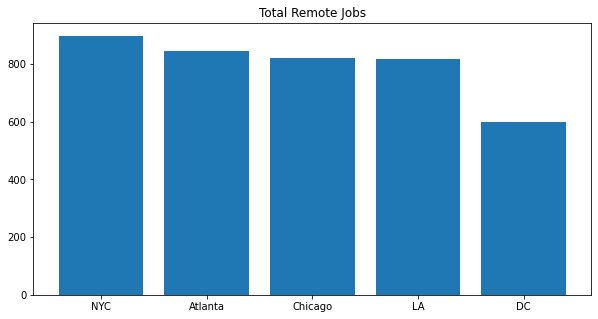

In [9]:
# plot the number of job listing per city. This include only the companies that listed their location. The companies that
# didn't list their location are in the remote dataset.
plt.rcParams['figure.figsize'] = (10,5)
Cities=['NYC', "Chicago", "Atlanta", "DC", "LA"]
NumJobs=[nyc.shape[0], chicago.shape[0], atlanta.shape[0], DC.shape[0], LA.shape[0]]
x,y=zip(*sorted(zip(Cities,NumJobs),reverse=True,key=lambda x:x[1]))
plt.bar(x,y)
plt.title('Total Remote Jobs')

Data may have duplicated posts.

Note: there were a lot more duplicates when the "30+ days ago" time posted was included.

In [10]:
print('Duplicated posts in NYC:',nyc.loc[nyc.duplicated(keep='first')].shape[0])
print('Duplicated posts in Atlanta:',atlanta.loc[atlanta.duplicated(keep='first')].shape[0])
print('Duplicated posts in Chicago:',chicago.loc[chicago.duplicated(keep='first')].shape[0])
print('Duplicated posts in LA:',LA.loc[LA.duplicated(keep='first')].shape[0])
print('Duplicated posts in DC:',DC.loc[DC.duplicated(keep='first')].shape[0])

Duplicated posts in NYC: 9
Duplicated posts in Atlanta: 9
Duplicated posts in Chicago: 24
Duplicated posts in LA: 12
Duplicated posts in DC: 4


Lets investigate where the duplicated posts coming from in chicago (the city with the highest number of duplicates).
Gpac KO Business Solutions, Tower Legal Solutions are staffing companies and Randstad General Staffing. According to Indeed Terms companies can pay to appear in the search many times. This can be the reason why these jobs where duplicated and why they appeared a lot in previous analysis when the data included pages that start with "30+ days ago"

In [11]:
chicago.loc[chicago.duplicated(keep='first')].groupby(
    ['Company','JobTitle']).count()['JobLoc'].rename('Duplicates').to_frame().sort_values(by=['Duplicates'],ascending=False)

Duplicates
Company                             JobTitle                                                      
gpac                                Remote Search Consultant/Recruiter (Work from H...           2
KO Business Solutions               Inbound Call Center Representative                           2
ProCare Therapy                     Tele School Social Worker job | 100% remote                  1
arrivia                             Travel Sales Representative (Base + Bonus & Com...           1
                                    Sales Representative (Base + Bonus & Commission...           1
VocoVision                          PT Tele-Speech Pathologist Illinois                          1
Vigilant Global Trade Services      Operational Account Manager                                  1
Varsity Tutors                      Digital Marketing Manager (Paid Channels)                    1
Tower Legal Solutions               Temporary Documentation Associate with Top Inve...           1
Randstad General Staffing           Remote Insurance Rating Specialist                           1
Proactive Worldwide, Inc.           Research Specialist - Remote                                 1
Bromic Heating                      Architectural Sales Representative - Outdoor Fi...           1
Confidential                        Chicago-based Cultural Blog/Vlog creator (Part-...           1
Kelly                               UX Designer - Chicago, IL (Remote)                           1
                                    Mortgage Loan Processor (Level 4) - 100% REMOTE              1
Infinity Consulting Solutions, Inc. QA Automation Manager - 100% Remote                          1
Essential Counseling Group          LMSW, LPC or LCSW PRN                                        1
Custom Retail Solutions             Sales Account Executive / COMISSION BASED                    1
CrossCountry Mortgage, LLC          Loan Officer Assistant                                       1
Confidential                        eCommerce Development Manager                                1
                                    Escrow Closing Specialist                                    1
ProCare Therapy                     Teacher of the Deaf and Hard of Hearing (DHHT) ...           1

Removing duplicated jobs and reploting moved LA to the third place instead of fourth and Chicago to the fourth instead of third; chicago had the most duplicated posts.

Text(0.5, 1.0, 'Total Remote Jobs in a month after removing duplicates')

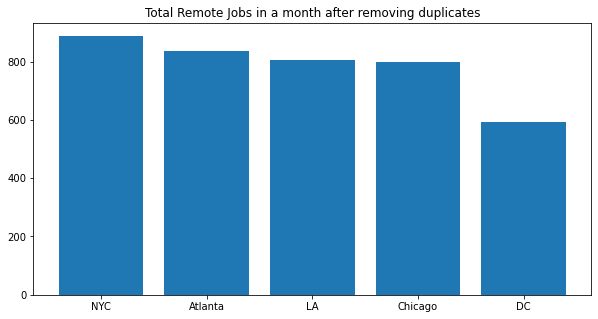

In [12]:
plt.rcParams['figure.figsize'] = (10,5)
nyc.drop_duplicates(inplace=True, keep='first')
atlanta.drop_duplicates(inplace=True, keep='first')
chicago.drop_duplicates(inplace=True, keep='first')
LA.drop_duplicates(inplace=True, keep='first')
DC.drop_duplicates(inplace=True, keep='first')
NumJobs=[nyc.shape[0], chicago.shape[0], atlanta.shape[0], DC.shape[0], LA.shape[0]]
x,y=zip(*sorted(zip(Cities,NumJobs),reverse=True,key=lambda x:x[1]))
plt.bar(x,y)
plt.title('Total Remote Jobs in a month after removing duplicates')

### What are the posting rates for remote positions by companies from these locations?

This function gets the counts per day after some data processing. Data were collected on different dates so that difference is also considered.

In [13]:
# define a function to get the count per day
# converting "Time ago to actual dates"
def per_day(df,date):
    counts=df.groupby('Date')['JobTitle'].count().rename('Jobs').to_frame()
    # Today and Just posted are both considered Today
    if len(counts.loc[counts.index == 'Today']) > 0:
        if len(counts.loc[counts.index == 'Just Posted']) > 0:
            just_posted_counts=int(counts.iloc[counts.index == 'Just posted']['Jobs'])
        else:
            just_posted_counts=0
        counts.iloc[counts.index == 'Today']=int(counts.iloc[counts.index == 'Today']['Jobs'])+just_posted_counts
        counts.drop('Just posted',inplace=True,errors="ignore")
    # convert the Date strings into integer. The date describes how old the posting is.
    Days=list(counts.index)
    for i,day in enumerate(counts.index):
        if day in ['Just posted','Today']:
            Days[i]=0
        else:
            Days[i]=int(day.split()[0])
    counts['Days Ago']=Days
    # sort ascendingly
    #drop30plus.sort_values(by=['Days Ago'],inplace=True)
    counts['Date Posted']=[str(datetime.datetime.strptime(date, '%m/%d/%Y').date()-datetime.timedelta(i)) for i in counts['Days Ago']]
    counts.sort_values(by=['Date Posted'],inplace=True)
    #return(counts)
    return(counts)
    

In [15]:
df=DC
counts=df.groupby('Date')['JobTitle'].count().rename('Jobs').to_frame()
# Today and Just posted are both considered Today
if len(counts.loc[counts.index == 'Today']) > 0:
    if len(counts.loc[counts.index == 'Just Posted']) > 0:
        just_posted_counts=int(counts.iloc[counts.index == 'Just posted']['Jobs'])
    else:
        just_posted_counts=0
    counts.iloc[counts.index == 'Today']=int(counts.iloc[counts.index == 'Today']['Jobs'])+just_posted_counts
    counts.drop('Just posted',inplace=True,errors="ignore")

In [16]:
# get the daily posts in the last month
nycDaily=per_day(nyc,"2/10/2021")
chicagoDaily=per_day(chicago,"2/12/2021")
atlantaDaily=per_day(atlanta,"2/12/2021")
DCDaily=per_day(DC,"2/15/2021") # DC doesn't have posts 30+ days ago
LADaily=per_day(LA,"2/11/2021")

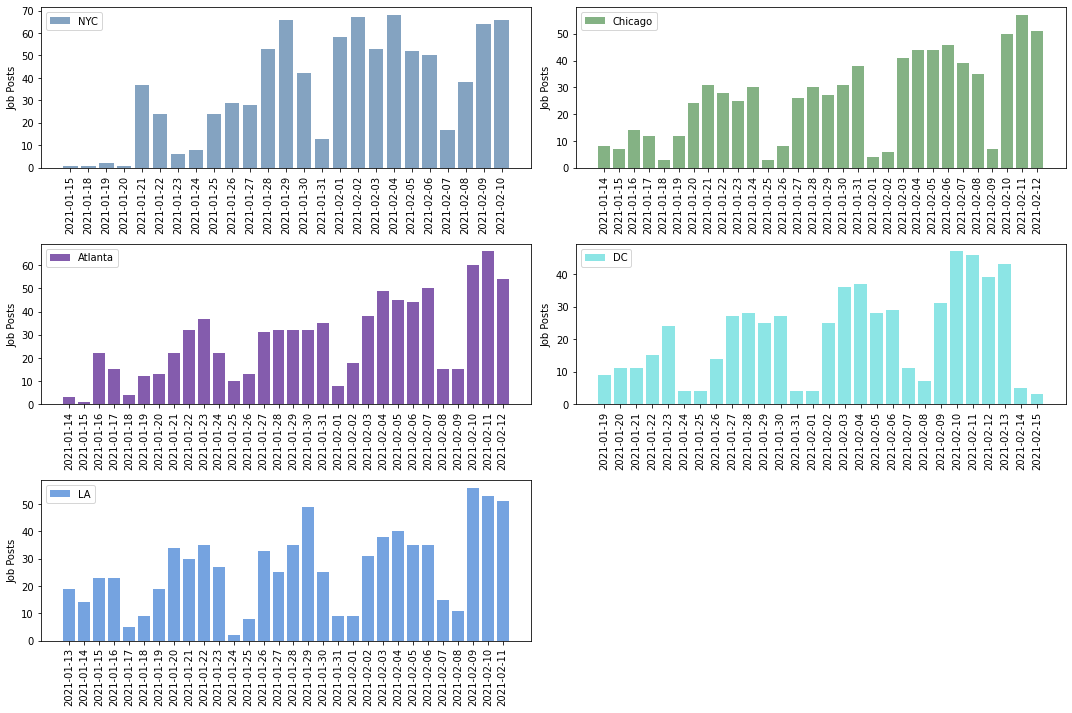

In [17]:
#plot the daily rates during the last month
plt.rcParams['figure.figsize'] = (15,10)

plt.subplot(3,2,1)
plt.bar(nycDaily['Date Posted'],nycDaily['Jobs'],label='NYC',color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation='vertical')
plt.ylabel('Job Posts')
plt.legend()

plt.subplot(3,2,2)
plt.bar(chicagoDaily['Date Posted'],chicagoDaily['Jobs'],label='Chicago',color=(0.2, 0.5, 0.2, 0.6))
plt.xticks(rotation='vertical')
plt.ylabel('Job Posts')
plt.legend()


plt.subplot(3,2,3)
plt.bar(atlantaDaily['Date Posted'],atlantaDaily['Jobs'],label='Atlanta',color=(0.4, 0.2, 0.6, 0.8))
plt.xticks(rotation='vertical')
plt.ylabel('Job Posts')
plt.legend()

plt.subplot(3,2,4)
plt.bar(DCDaily['Date Posted'],DCDaily['Jobs'],label='DC',color=(0.1, 0.8, 0.8, 0.5))
plt.xticks(rotation='vertical')
plt.ylabel('Job Posts')
plt.legend()

plt.subplot(3,2,5)
plt.bar(LADaily['Date Posted'],LADaily['Jobs'],label='LA',color=(0.1, 0.4, 0.8, 0.6))
plt.xticks(rotation='vertical')
plt.ylabel('Job Posts')
plt.legend()

plt.tight_layout()


Most of the posted remote jobs don't have specified locations. The unspec dataframe contains the posted jobs from 1/29/2021 until 2/5/2021. There's a big difference in the number from the specified locations just in 7 days. There is a lot of duplicated jobs.

In [18]:
# "unspec" dataset is all the jobs posted in 7 days. The location of the companies is unspecified so the location is
# listed to be "unspecified". I chose to scrape the data in 7 days because the data is huge in this category.
unspec=pd.read_csv(r'indeed\IndeedRemote.csv')

In [19]:
print('The total number of jobs:', unspec.shape[0])
print('The number of duplicated jobs:',unspec.loc[unspec.duplicated(keep='first')].shape[0])

The total number of jobs: 4721
The number of duplicated jobs: 3326


About quarter of the data is duplicated. Let's look what companies and jobs get duplicated. EPM Scientific, TAJ Technologies Inc, LandrumHR, Healthcare IT Leaders are staffing companies.

In [20]:
df=unspec
df.loc[df.duplicated(keep='first')].groupby(
    ['Company','JobTitle']).count()['JobLoc'].rename('Repeats').to_frame().sort_values(by=['Repeats'],ascending=False)

Repeats
Company                  JobTitle                                                   
EPM Scientific           Associate Scientific Director Medical Scientific        137
TAJ Technologies Inc     Cyber Security Consultant, Remote Position, Onl...      132
LandrumHR                UI/UX Designer                                          123
Healthcare IT Leaders    SOX Implementation Consultant                           110
Elior North America      Business Development Analyst                             97
...                                                                              ...
EPM Scientific           Global Market Access Manager                              1
                         Medical Writing Project Manager                           1
Outsourced Resource, Inc Scientific Program Manager- REMOTE                        1
OpTech LLC               Contract/Procurement Specialist                           1
InterSec Inc.            Mortgage Processor                                        1

[193 rows x 1 columns]

Even with droping all duplicates, here's a total of 1395 jobs posted in 7 days that are much more than the posts in NYC in a month. Companies are starting not to require a location preference for their reomte jobs.

In [21]:
unspec.drop_duplicates(inplace=True)
unspec.shape[0]

1395

Posting rate of unspec

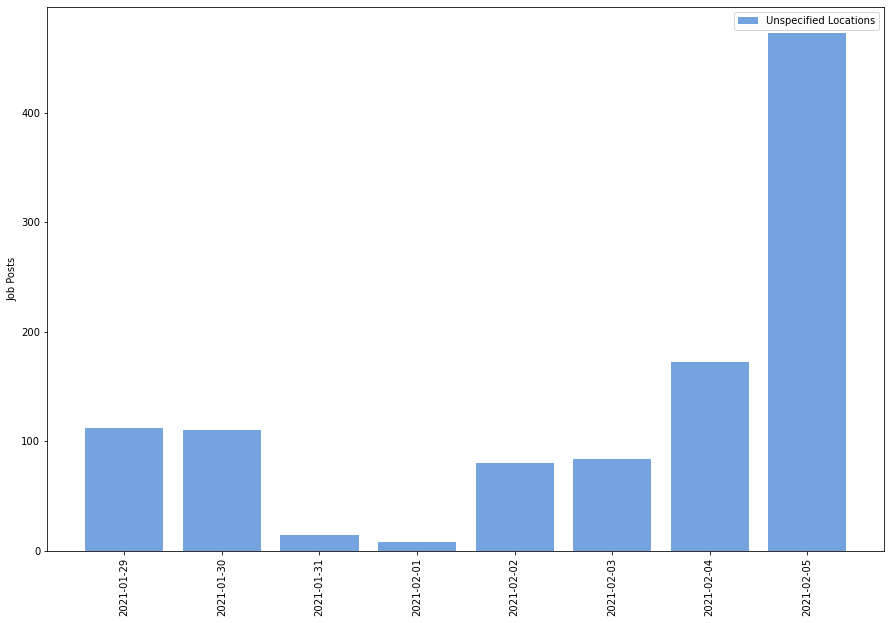

In [22]:
unspecDaily=per_day(unspec,"2/5/2021")
plt.bar(unspecDaily['Date Posted'],unspecDaily['Jobs'],label='Unspecified Locations',color=(0.1, 0.4, 0.8, 0.6))
plt.xticks(rotation='vertical')
plt.ylabel('Job Posts')
plt.legend()

### What are the most requested jobs for remote positions in all locations?

In [23]:
# compine all data frames to run the analysis on the natural language
allLocs=pd.concat([unspec,nyc,chicago,atlanta,LA,DC],ignore_index=True)
allLocs.shape[0]

5314

In [24]:
# text cleaning function
def cleaning(text,salary=False):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    if salary:
        text = text.lower()
        #text = re.sub('https?://\S+|www\.\S+', ' ', text)
        text = re.sub("\+", '', text)
        text = re.sub(',', '', text)
        text = re.sub('\$', '', text)
        text = re.sub('-', ' ', text)
        #text = re.sub('\n', ' ', text)
        text = re.sub('[’“”…]', ' ', text)         
    else:
        text = text.lower()
        text = re.sub('https?://\S+|www\.\S+', ' ', text)
        text = re.sub('<.*?>+', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
        text = re.sub('\n', ' ', text)
        text = re.sub('[’“”…]', ' ', text)      
    
    # removing the stop-words
    stop_words = stopwords.words()
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text

In [25]:
# a function to extract the "topN" frequent "n" combination of words in a "text" 
def freq_n_words(text,n,topN):
    words = nltk.tokenize.word_tokenize(text)
    ngrm = list(nltk.ngrams(words,n))
    word_dist = nltk.FreqDist([' '.join(x) for x in ngrm])
    rslt = pd.DataFrame(word_dist.most_common(topN),
                    columns=['Words', 'Frequency'])
    rslt.set_index('Words',inplace=True)
    return(rslt)

The most requested jobs in all locations

In [26]:
df=allLocs
dt = df['JobTitle'].dropna().astype(str).apply(cleaning)
text=" ".join(dt)

In [27]:
freq_jobs=freq_n_words(text,2,10)
freq_jobs

,Frequency
Words,
sales representative,216
account executive,157
project manager,120
business development,120
account manager,117
summer 2021,98
social media,94
marketing manager,92
sales manager,89


<AxesSubplot:title={'center':'Most requested remote jobs'}>

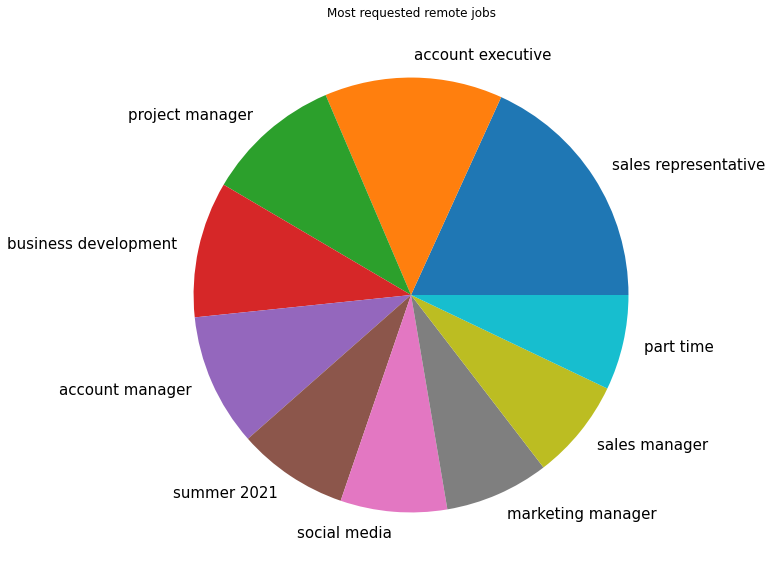

In [28]:
freq_jobs.plot.pie(y='Frequency', figsize=(10, 10),legend=None,
                   title='Most requested remote jobs',
                   fontsize=15,ylabel='')


### What are the most requested qualifications for remote positions in all locations?

In [29]:
dt = df['Qualifications'].dropna().astype(str).apply(cleaning)
text=" ".join(dt)

In [30]:
# most repeated 3 words in the qualifications
freq_quals_3=freq_n_words(text,3,20)
freq_quals_3

,Frequency
Words,
1 year preferred,1048
high school equivalent,397
school equivalent preferred,327
preferred bachelor preferred,320
us work authorization,268
required bachelor preferred,250
2 years preferred,245
preferred high school,231
3 years preferred,230


In [31]:
# most repeated 2 words in the qualifications
freq_quals_2=freq_n_words(text,2,20)
freq_quals_2

,Frequency
Words,
1 year,1256
year preferred,1048
years preferred,671
bachelor preferred,591
years required,541
2 years,426
preferred bachelor,418
3 years,400
high school,397


In [32]:
# most repeated 1 word in the qualifications
freq_quals_1=freq_n_words(text,1,20)
freq_quals_1

,Frequency
Words,
preferred,3117
required,1493
1,1256
year,1256
years,1212
bachelor,747
experience,480
sales,466
2,430


Combine similar rows from the three quals datasets.

In [33]:
freq_quals=freq_quals_3
idx_list = freq_quals.index.tolist()

# the two work authorization requirements are mostly overlapping
freq_quals.drop('work authorization required', inplace=True)
freq_quals.drop('required us work', inplace=True)


# remove sales and add it from freq_quals_1
freq_quals.drop('sales experience 1', inplace=True)
freq_quals.drop('preferred sales experience', inplace=True)
freq_quals=freq_quals.append(freq_quals_1.loc[freq_quals_1.index=='sales'])

# remove high school related rows and add them from  freq_quals_2
freq_quals.drop('high school equivalent', inplace=True)
freq_quals.drop('school equivalent preferred', inplace=True)
freq_quals.drop('preferred high school', inplace=True)
freq_quals.drop('required high school', inplace=True)
freq_quals=freq_quals.append(freq_quals_2.loc[freq_quals_2.index=='high school'])

# remove bachelor related rows and add them from  freq_quals_1
freq_quals.drop('preferred bachelor preferred', inplace=True)
freq_quals.drop('required bachelor preferred', inplace=True)
freq_quals.drop('year preferred bachelor', inplace=True)
freq_quals=freq_quals.append(freq_quals_1.loc[freq_quals_1.index=='bachelor'])

freq_quals.sort_values(by=['Frequency'],ascending=False,inplace=True)

In [34]:
freq_quals[0:10]

,Frequency
Words,
1 year preferred,1048
bachelor,747
sales,466
high school,397
us work authorization,268
2 years preferred,245
3 years preferred,230
1 year required,208
2 years required,181


<AxesSubplot:title={'center':'Most requested qualifications'}>

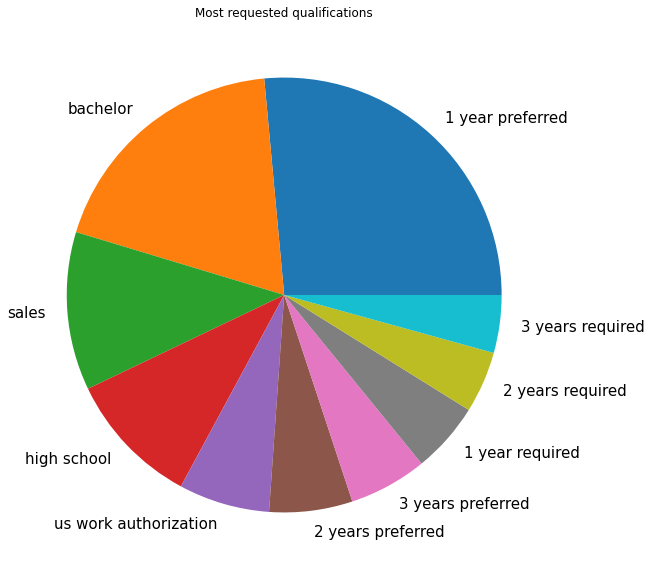

In [35]:
freq_quals[0:10].plot.pie(y='Frequency', figsize=(10, 10),legend=None, 
                          fontsize=15,title='Most requested qualifications',ylabel='')

### How are the salaries distributed?

After dropping NA salaries, 2085 jobs are left.

In [36]:
allLocWithSalary=allLocs.dropna(subset=['Salary']).reset_index(drop=True)
allLocWithSalary.shape[0]

2056

In [37]:
allLocWithSalary.Salary

0              From $9 an hour ++
1               $20 - $24 an hour
2               $13 - $15 an hour
3        $55,000 - $65,000 a year
4                  $32.39 an hour
                  ...            
2051            $50 - $60 an hour
2052     $45,000 - $50,000 a year
2053             From $25 an hour
2054               $21.35 an hour
2055    $85,000 - $160,000 a year
Name: Salary, Length: 2056, dtype: object

In [38]:
# clean the salaries and put them in a dictionary
salary_dict={'index':[],'MinSalary':[],'MaxSalary':[],'PayRate':[], 'AvgHourlyRate':[]}
for i,text in enumerate(allLocWithSalary.Salary):
    salary_dict['index'].append(i)
    text=cleaning(text,salary=True).split()
    salary_dict['PayRate'].append(text[-1])
    # ignore the entry if it is not in the assumed format
    try:
        salary_dict['MaxSalary'].append(float(text[-2]))
    except:
        salary_dict['MaxSalary'].append(None)
        salary_dict['MinSalary'].append(None)
        salary_dict['AvgHourlyRate'].append(None)
        continue
    try:
        salary_dict['MinSalary'].append(float(text[-3]))
    except:
        # if there is no min salary, min = max
        salary_dict['MinSalary'].append(float(text[-2]))
    #convert salaries to hourly rate
    # assumptions are made:
    # a work day has 8 hours
    # week has 5 days * 8 hours
    # a month has 4 week * 5 days * 8 hours
    # a year has 250 days * 8 hours
    if salary_dict['PayRate'][i]=='year':
        AvgSalary=round( (salary_dict['MinSalary'][i]+salary_dict['MaxSalary'][i])/2 / 250 / 8 ,2)
    elif salary_dict['PayRate'][i]=='month':
        AvgSalary=round( (salary_dict['MinSalary'][i]+salary_dict['MaxSalary'][i])/2 / 4 / 5 / 8 ,2)
    elif salary_dict['PayRate'][i]=='week':
        AvgSalary=round( (salary_dict['MinSalary'][i]+salary_dict['MaxSalary'][i])/2 / 5 / 8 ,2)
    elif salary_dict['PayRate'][i]=='day':
        AvgSalary=round( (salary_dict['MinSalary'][i]+salary_dict['MaxSalary'][i])/2 / 8 ,2)
    elif salary_dict['PayRate'][i]=='hour':
        AvgSalary=round( (salary_dict['MinSalary'][i]+salary_dict['MaxSalary'][i])/2 ,2)
    else:
        AvgSalary=float("NaN")
    
    salary_dict['AvgHourlyRate'].append(AvgSalary)

In [39]:
salaries=pd.DataFrame.from_dict(salary_dict)

In [40]:
allLocWithSalary=pd.concat([allLocWithSalary,salaries],axis=1).drop('index',axis=1).dropna(subset=['AvgHourlyRate'])

The average and median salary for the posted remote jobs are \\$36.52/hr (\\$73,040/year) and \\$30/hr (\\$60,000/year). The distribution looks like a lognormal distribution. It is skewed with low mean salary and high variance. A lot of jobs offer low salaries and less jobs offer significantly higher salaries that causes this high variance. Thus jobs can be categorized into lowly and highly paid jobs.

Text(-4.5, 75.0, 'Median: 30.0')

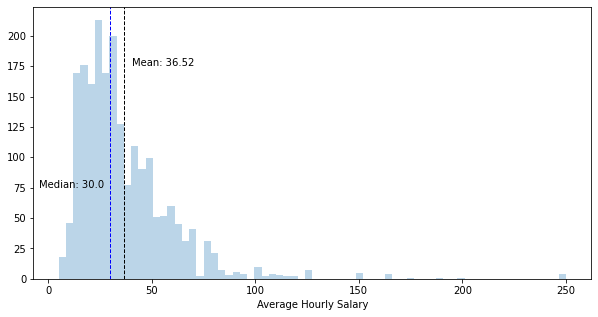

In [41]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(allLocWithSalary.AvgHourlyRate, bins = 70,
        histtype='stepfilled', alpha=0.3)
plt.xlabel('Average Hourly Salary')
plt.axvline(allLocWithSalary.AvgHourlyRate.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(allLocWithSalary.AvgHourlyRate.mean()*1.1, 250*0.7, 'Mean: {:.2f}'.format(allLocWithSalary.AvgHourlyRate.mean()))
plt.axvline(allLocWithSalary.AvgHourlyRate.median(), color='b', linestyle='dashed', linewidth=1)
plt.text(allLocWithSalary.AvgHourlyRate.median()*-0.15, 250*0.3, 'Median: {:.1f}'.format(allLocWithSalary.AvgHourlyRate.median()))

### What are the characterstics of lower- and higher-payjobs?

In [42]:
medianS=allLocWithSalary.AvgHourlyRate.median()
LowPay=allLocWithSalary.loc[allLocWithSalary.AvgHourlyRate < medianS]
HighPay=allLocWithSalary.loc[allLocWithSalary.AvgHourlyRate >= medianS]

In [43]:
# below median dataset
LowPay.head()

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text,MinSalary,MaxSalary,PayRate,AvgHourlyRate
0,The Pisa Group,Today,unspecified,Inbound Customer Service Representative,NaN,From $9 an hour ++,We need to hire Inbound Customer Service Reps ...,9.0,9.0,hour,9.0
1,Capital Staffing Solutions,Today,unspecified,KYC Operations Analyst,NaN,$20 - $24 an hour,KYC Analyst- REMOTE12+ Months$20-24/hr DOERole...,20.0,24.0,hour,22.0
2,i Qor NA,Today,unspecified,Spanish Bilingual Sales Associate,NaN,$13 - $15 an hour,"OUR PRODUCT IS SERVICE, OUR STRENGTH IS PEOPLE...",13.0,15.0,hour,14.0
6,DD & MH Provider of Oregon,Today,unspecified,Employment Specialist/Direct Support Professional,NaN,$16 - $30 an hour,Now Hiring Employment Professional/Direct Supp...,16.0,30.0,hour,23.0
8,"Thermal Engineering, LLC",Today,unspecified,Apprentice Hydronic & Radiant Installer,NaN,$13 - $27 an hour,Job Title: Apprentice Hydronic & Radiant Insta...,13.0,27.0,hour,20.0


In [44]:
LowPay.shape[0]

961

In [45]:
# above median dataset
HighPay.head()

,Company,Date,JobLoc,JobTitle,Qualifications,Salary,Text,MinSalary,MaxSalary,PayRate,AvgHourlyRate
3,InterSec Inc.,Today,unspecified,Mortgage Closer,"Experience:Mortgage Closing, 3 years (Required)","$55,000 - $65,000 a year",Job Title Mortgage CloserLocation: RemotePosit...,55000.00,65000.00,year,30.00
4,Ascendo Resources,Today,unspecified,Financial Reporting Analyst,NaN,$32.39 an hour,Business InitiativeThe successful candidate wi...,32.39,32.39,hour,32.39
5,TCA Consulting Group Inc.,Just posted,unspecified,Business Analyst,Bachelor's (Preferred)SQL: 1 year (Preferred)B...,$55 - $56 an hour,Individuals in this position have demonstrated...,55.00,56.00,hour,55.50
7,"Ali Awad Law, P.C.",Today,unspecified,Workers Compensation Paralegal - Bilingual Pre...,High school or equivalent (Preferred)Microsoft...,"$52,000 - $78,000 a year","Ali Awad Law, P.C. is a personal injury law fi...",52000.00,78000.00,year,32.50
9,Superba Vox Music Academy,Today,unspecified,Voice/Piano/Guitar Music Teacher- ONLINE,Bachelor's (Required)US work authorization (Re...,$30 an hour,Teaching high-quality music lessons in a priva...,30.00,30.00,hour,30.00


In [46]:
HighPay.shape[0]

1092

In [47]:
# this is a list of the redundant repeated words in the descriptions of the jobs "Text"
ExclusionList=['000 00','precaution remote','precaution remote','00 yearbenefits','location fully',
 'remote interview',
 'precaution remote',
 'work location','year preferred',
 '19 precaution','00 yearbenefits',
 'preferred experience',
 'years preferred','years required','years experience',
 'preferred work',
 'job type']

Clean and parse the job descriptions for the high-paid jobs

In [68]:
df=HighPay
dt = df['Text'].dropna().astype(str).apply(cleaning)
textDH=" ".join(dt)

In [69]:
freq_descH=freq_n_words(textDH,2,35)
freq_descH.drop(ExclusionList,inplace=True,axis=0,errors='ignore')
freq_descH

,Frequency
Words,
full time,766
1 year,499
type full,458
3 years,421
full timepay,404
5 years,375
types full,339
2 years,321
part time,305


The most frequenrt charactristics of the high-paid jobs.

In [71]:
# drop these rows for redundancy
freq_descH.drop(['type full','types full','time part'], inplace=True)
freq_descH.sort_values(by=['Frequency'],ascending=False,inplace=True)
# get only the top 15 then sort ascendingly
freq_descH=freq_descH[0:15]
freq_descH

,Frequency
Words,
full time,766
1 year,499
3 years,421
full timepay,404
5 years,375
2 years,321
part time,305
federal employees,305
sales experience,261


The most repeated job types. I collect the most repeated words in the job title for that.

In [51]:
dt = df['JobTitle'].dropna().astype(str).apply(cleaning)
textJH=" ".join(dt)

In [84]:
freq_jobH=freq_n_words(textJH,1,30)
freq_jobH.drop(ExclusionList,axis=0,errors='ignore',inplace=True)
freq_jobH.sort_values(by=['Frequency'],ascending=False,inplace=True)
freq_jobH

,Frequency
Words,
sales,231
manager,191
remote,137
representative,94
analyst,82
specialist,81
executive,78
mortgage,75
account,68


In [85]:
# drop these rows for redundancy
freq_jobH.drop(['account', 'business','project','digital','remote','outside'], inplace=True)
freq_jobH=freq_jobH[0:15]
freq_jobH[0:15]

,Frequency
Words,
sales,231
manager,191
representative,94
analyst,82
specialist,81
executive,78
mortgage,75
consultant,51
marketing,41


Repeat the same analysis for low-paid job

In [54]:
df=LowPay
dt = df['Text'].dropna().astype(str).apply(cleaning)
textDL=" ".join(dt)

In [81]:
freq_descL=freq_n_words(textDL,2,60)
freq_descL.drop(ExclusionList,axis=0,errors='ignore',inplace=True)
freq_descL

,Frequency
Words,
full time,709
1 year,633
customer service,461
social media,422
part time,404
2 years,391
type full,350
high school,322
full timepay,311


In [78]:
# drop these rows for redundancy
freq_descL.drop(['type full','types full','insurancepaid time', 'insurancepaid time', 'interview processvirtual',
                  'processvirtual meetings','yescovid 19', 'time part','fast paced','00 hourbenefits', 'interview process',
                 'job types','work home','remotely yescovid','school equivalent','equivalent preferred'], inplace=True)
#freq_descL.sort_values(by=['Frequency'],ascending=False,inplace=True)
#freq_descL=freq_descL_[0:15]
freq_descL=freq_descL[0:15]
freq_descL

,Frequency
Words,
full time,709
1 year,633
customer service,461
social media,422
part time,404
2 years,391
high school,322
full timepay,311
communication skills,252


In [62]:
# get top 15 job titles
dt = df['JobTitle'].dropna().astype(str).apply(cleaning)
textJL=" ".join(dt)

In [86]:
# most frequent 1-word words
freq_JobL=freq_n_words(textJL,1,30)
freq_JobL.drop(ExclusionList,axis=0,errors='ignore',inplace=True)
freq_JobL.sort_values(by=['Frequency'],ascending=False,inplace=True)
freq_JobL

,Frequency
Words,
sales,138
representative,117
remote,103
specialist,101
manager,89
customer,66
coordinator,62
service,59
assistant,57


In [87]:
# drop redundant words
freq_JobL.drop(['remote','service','home','account','work','social','time','business'], inplace=True)
freq_JobL=freq_JobL[0:15]
freq_JobL

,Frequency
Words,
sales,138
representative,117
specialist,101
manager,89
customer,66
coordinator,62
assistant,57
intern,49
marketing,47


In [79]:
# rename the frequency columns in the desc and jobs dataframes
freq_descH.rename(columns={"Frequency": "FrequencyH"},inplace=True)
freq_descL.rename(columns={"Frequency": "FrequencyL"},inplace=True)
# Join Characterstics dataframes
desc=pd.concat([freq_descH,freq_descL],axis=1)

C:\Users\Ibrahim\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(0.5, 1.0, 'Top 15 Characterstics for each of higher-pay and lower-pay jobs')

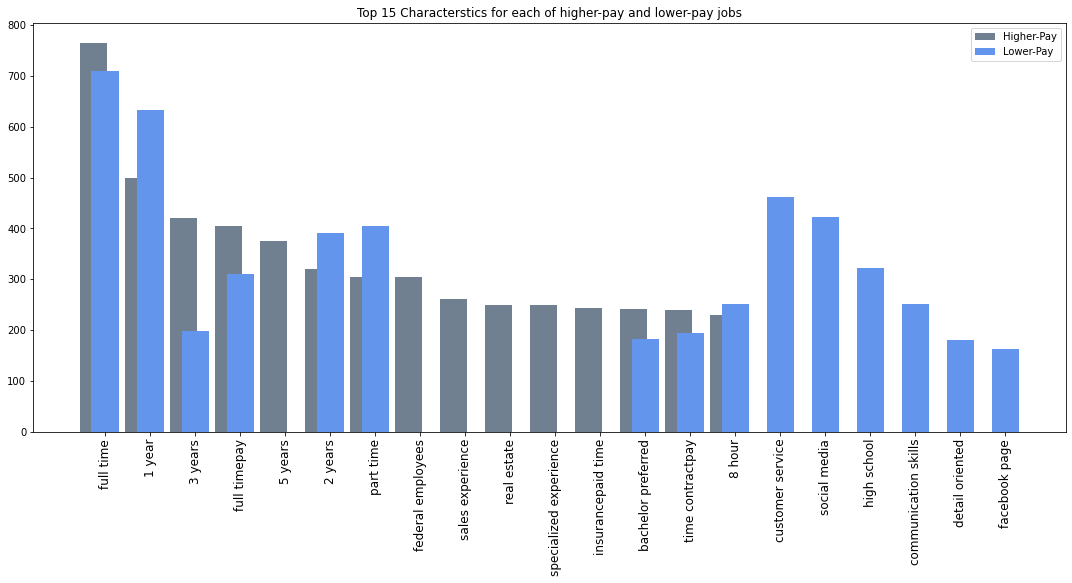

In [80]:
plt.rcParams['figure.figsize'] = (15,8)
characs=list(desc.index)
bar_width=0.25
index=np.arange(len(characs))
plt.bar(index,desc.FrequencyH,label='Higher-Pay',width=0.6, color='slategray')
plt.bar(index+bar_width,desc.FrequencyL,label='Lower-Pay',width=0.6, color='cornflowerblue')
plt.legend()
plt.xticks(index + bar_width, characs,rotation=90, fontsize=12)
plt.tight_layout()
plt.title('Top 15 Characterstics for each of higher-pay and lower-pay jobs')


In [89]:
# rename the frequency columns in the jobs dataframes
freq_jobH.rename(columns={"Frequency": "FrequencyH"},inplace=True)
freq_JobL.rename(columns={"Frequency": "FrequencyL"},inplace=True)
# Join Characterstics dataframes
jobs=pd.concat([freq_jobH,freq_JobL],axis=1)

C:\Users\Ibrahim\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(0.5, 1.0, 'Top 15 job types for each of higher-pay and lower-pay jobs')

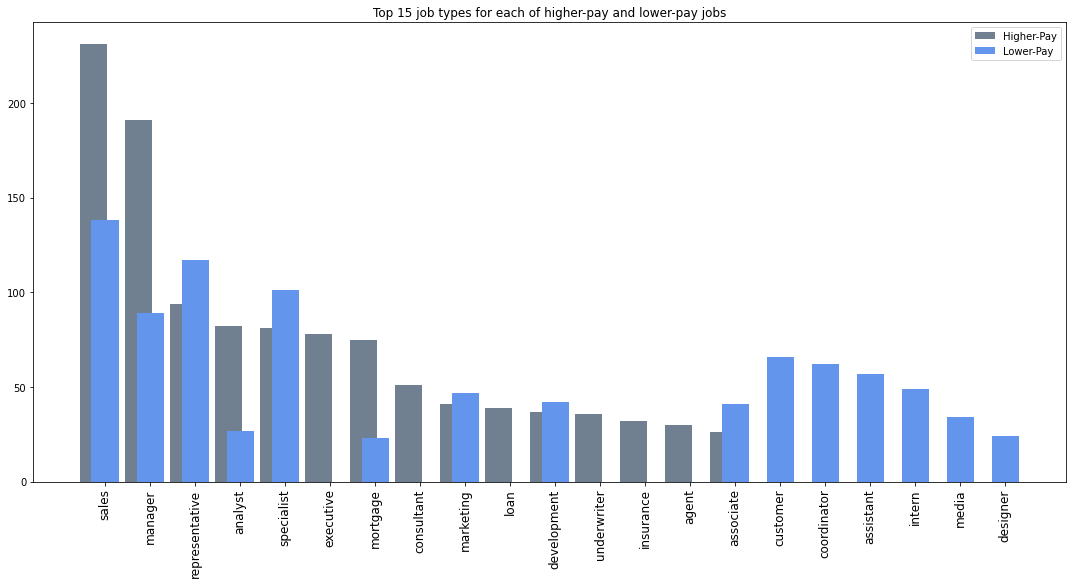

In [90]:
jobnames=list(jobs.index)
bar_width=0.25
index=np.arange(len(jobnames))
plt.bar(index,jobs.FrequencyH,label='Higher-Pay',width=0.6, color='slategray')
plt.bar(index+bar_width,jobs.FrequencyL,label='Lower-Pay',width=0.6, color='cornflowerblue')
plt.legend()
plt.xticks(index + bar_width, jobnames,rotation=90, fontsize=12)
plt.tight_layout()
plt.title('Top 15 job types for each of higher-pay and lower-pay jobs')